In [1]:
class City:
    # constructor function that initialized all the variables to be used within the class
    def __init__(self, code, name, region, pop, lat, long):
        self.code = str(code)
        self.name = str(name)
        self.region = str(region)
        self.pop = int(pop)
        self.lat = float(lat)
        self.long = float(long)
    
    # constructor function to print a string of information when an object is printed
    def __str__(self):
        return self.name + "," + str(self.pop) + "," + str(self.lat) + "," + str(self.long)
    
    # gets the population
    def get_population(self):
        return self.pop
    
    # gets the latitude
    def get_latitude(self):
        return self.lat
    
    # gets the name
    def get_name(self):
        return self.name

In [2]:
# reads file and makes objects out of the lines
cities = []
my_file = open("world_cities.txt", "r")
for line in my_file:
    cd = line.split(",")
    
    new_city = City(cd[0],cd[1],cd[2],int(cd[3]),float(cd[4]),float(cd[5]))
    cities.append(new_city)


In [3]:
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()

In [4]:
# sorts the citites list alphabetically by name
sort(cities, compare_name)

In [5]:
# writes the list to a file
alpha = open('cities_alpha.txt', 'w')
for city in cities:
    alpha.write(city.__str__() + "\n")
alpha.close()

In [6]:
# sorts the cities list by population
sort(cities, compare_population)

In [7]:
# writes the list to a file
population = open('cities_population.txt', 'w')
for city in cities:
    population.write(city.__str__() + "\n")
population.close()

In [8]:
# sorts the cities list by latitude
sort(cities, compare_latitude)

In [9]:
# writes the list to a file
latitude = open('cities_latitude.txt', 'w')
for city in cities:
    latitude.write(city.__str__() + "\n")
latitude.close()

In [10]:
import matplotlib.pyplot as plt

In [11]:
# establishes dimensions of canvas
WIDTH = 720 # image (world.png) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution

In [12]:
# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

In [13]:
import time
import IPython.display

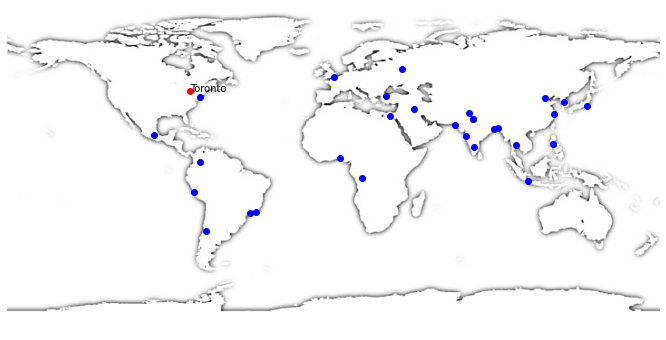

In [14]:
# makes a list of the file information
pop_data = []
pop_file = open("cities_population.txt", "r")
for line in pop_file:
    cd = line.split(",")
    pop_data.append(cd)

# establishes 2 new lists for latitude and longitude information
lat_list = []
long_list = []

# animates the map
for i in range(0,30):
    img = plt.imread("world.jpg")
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) # Display the image
    plt.axis('off')
    
    # places blue dots on the map for cities already highlighted
    for j in range(0, len(lat_list)):
        plt.plot(lat_list[j], long_list[j], 'bo')
    
    # places a red dot and name of the city on the map for the current data 
    lat_pix, long_pix = longlat_to_pixel(float(pop_data[i][2]),float(pop_data[i][3]))
    plt.plot(lat_pix,long_pix, 'ro') # plot one blue data point
    plt.annotate(pop_data[i][0], (lat_pix, long_pix))
    plt.show()
    
    # slows the time between frames and clears the screen 
    time.sleep(0.5)
    IPython.display.clear_output(wait=True)
    
    # updates the lists
    lat_list.append(lat_pix)
    long_list.append(long_pix)
    
